In [1]:
import numpy as np
import matplotlib.pyplot as plt
import smplotlib
from scipy.constants import h, k, c

In [2]:
T_dust = 20
M_dust = 1e-2 * 1.989e30
d = 150
d_m = d * 3.086e16
theta_arcmin = 5
theta_rad = np.radians(theta_arcmin / 60)

kappa_0 = 0.1  # cm^2/g at 1000 GHz
nu_0 = 1e12
beta = 1.7

wavelengths = np.logspace(-5, -2, 100)  # meters (from 10 µm to 3 mm)
frequencies = c / wavelengths

kappa_nu = kappa_0 * (frequencies / nu_0) ** beta  # Dust absorption coefficient (cm^2/g
kappa_nu_m2kg = kappa_nu * 0.1

A = np.pi * (theta_rad * d_m) ** 2  # Approximate projected area in m^2
Sigma_dust = M_dust / A

tau_nu = kappa_nu_m2kg * Sigma_dust

B_nu = (2 * h * frequencies**3 / c**2) / (np.exp(h * frequencies / (k * T_dust)) - 1)

S_nu = B_nu * (1 - np.exp(-tau_nu))

Omega = (theta_rad / 2) ** 2 * np.pi  # Approximate solid angle

F_nu = S_nu * Omega

B_nu_blackbody = B_nu * Omega

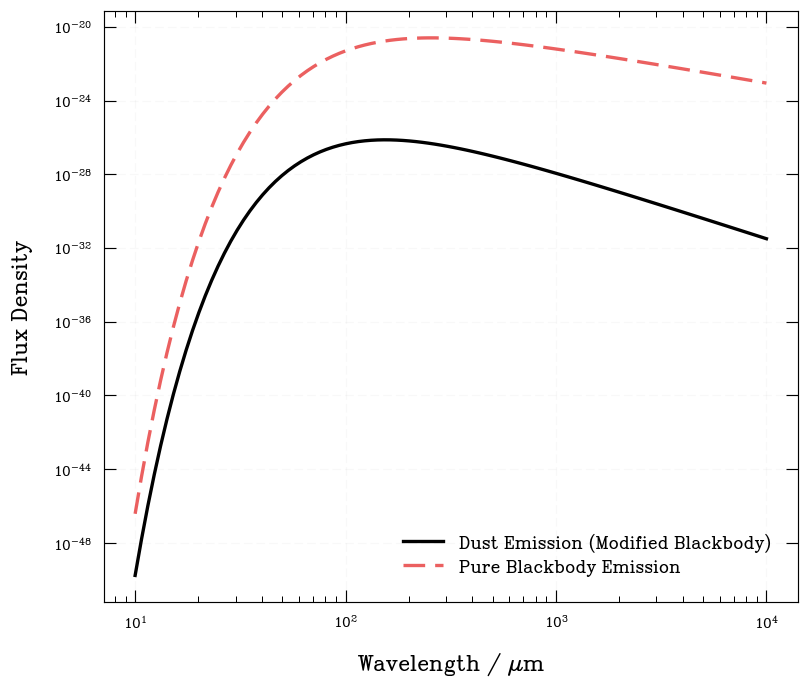

In [3]:
fig, ax = plt.subplots(figsize = (7, 6))
ax.grid(alpha = 0.05)
ax.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xlabel('Wavelength / $\mu$m', fontsize = 15, labelpad = 12)
ax.set_ylabel('Flux Density', fontsize = 15, labelpad = 12)
ax.loglog(wavelengths * 1e6, F_nu, label = 'Dust Emission (Modified Blackbody)', lw = 2)
plt.loglog(wavelengths * 1e6, B_nu_blackbody, '--', label = 'Pure Blackbody Emission', lw = 2, alpha = 0.7)
plt.legend(fontsize = 12, loc = 'lower right')

plt.tight_layout()
plt.savefig('Q05_SED.pdf', dpi = 500)